In [1]:
#Visualise Drift lines

In [2]:

#INITIALIZION
#Kernel PyROOT
import os
#os.sys.path.append('/usr/common/software/rootpy')
#os.sys.path.insert(0,'/usr/common/software/uproot')
#import root_numpy
#import root_numpy as root_np
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
#matplotlib.use('GTK3Agg')
import ROOT
import pandas as pd
from scipy.optimize import curve_fit

import sys
from matplotlib.colors import LogNorm
import pylab

import glob
import uproot

import scipy
from scipy.optimize import curve_fit

%pylab inline
#pylab.rcParams['figure.figsize'] = (10.0, 8.0)

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

print("Starting notebook....")





Welcome to JupyROOT 6.16/00
Populating the interactive namespace from numpy and matplotlib
Starting notebook....


/cvmfs/sft.cern.ch/lcg/views/LCG_95/x86_64-centos7-gcc8-opt/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['pylab']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
#Function to turn file into arrays
def Get_drift_line_arrays(filename):
    file = open(filename, 'r')
    lines = file.readlines()

    #print len(lines)
    #print lines[2]

    rIN_cm = float(lines[10].split('\t\t')[0])
    zIN_cm = float(lines[10].split('\t\t')[1])

    DriftTime_us_list = []
    r_cm_list = []
    z_cm_list = []

    DriftTime_us_list.append(0.0)
    r_cm_list.append(rIN_cm)
    z_cm_list.append(zIN_cm)

    for i in range(0,len(lines)):
        if lines[i].startswith('#'):
            continue
        else:
            a = lines[i].split('\t\t')
            #print a
            DriftTime_us_list.append(float(a[2]))
            r_cm_list.append(float(a[3]))
            z_cm_list.append(float(a[4]))
    return np.asarray(r_cm_list), np.asarray(z_cm_list), np.asarray(DriftTime_us_list)

def Get_file_length(filename):
    file = open(filename, 'r')
    lines = file.readlines()
    return len(lines)


def Get_i_line_from_file(filename, i):
    file = open(filename, 'r')
    lines = file.readlines()
    #print lines[i]
    a = lines[i].split('\t\t')
    DriftTime_us= float(a[2])
    r_cm = float(a[3])
    z_cm = float(a[4])
    return r_cm, z_cm, DriftTime_us


print "\n\t...Done!"


	...Done!


In [4]:
"""
fil = file_list_Dense[0]
print fil

Get_i_line_from_file(fil, 4)"""

'\nfil = file_list_Dense[0]\nprint fil\n\nGet_i_line_from_file(fil, 4)'

In [5]:
#Import Field Strength
inpath = '/home/rossiter/XYZPositionCorrector/gateregion_100kv_100.txt'
FIELD_z_cm = []
FIELD_r_cm = []
FIELD_U_V=[]
FIELD_E_Vpm= []
FIELD_Ez_Vpm= []
FIELD_Er_Vpm= []

for line in open(inpath):
    if line.startswith('#'):
        continue
    if line.startswith('*'):
        continue
    else:
        data = line.split(',\t\t')
        FIELD_z_cm.append(-1*float(data[0]))
        FIELD_r_cm.append(float(data[1]))
        FIELD_U_V.append(float(data[2]))
        FIELD_E_Vpm.append(float(data[3])/10.)
        FIELD_Ez_Vpm.append(float(data[4])/10.)
        FIELD_Er_Vpm.append(float(data[5])/10.)

print "\t\t...Done!"

		...Done!


In [6]:
#Get all txt files in directory
data_dir = "/data/rossiter/lz/TopGridAnalysis_200507/"
file_list=[]
for file in os.listdir(data_dir):
    if file.endswith(".txt"):
        print(os.path.join(file))
        file_list.append(data_dir+os.path.join(file))

print "len(file_list): "+str(len(file_list))

SingleDriftLineCalc_0.0001cm_r00.01cm_z144.9cm_0507.txt
SingleDriftLineCalc_0.0001cm_r00.03cm_z144.9cm_0507.txt
SingleDriftLineCalc_0.0001cm_r00.05cm_z144.9cm_0507.txt
SingleDriftLineCalc_0.0001cm_r00.07cm_z144.9cm_0507.txt
SingleDriftLineCalc_0.0001cm_r01.01cm_z144.9cm_0507.txt
SingleDriftLineCalc_0.0001cm_r00.09cm_z144.9cm_0507.txt
SingleDriftLineCalc_0.0001cm_r01.03cm_z144.9cm_0507.txt
SingleDriftLineCalc_0.0001cm_r00.11cm_z144.9cm_0507.txt
SingleDriftLineCalc_0.0001cm_r01.05cm_z144.9cm_0507.txt
SingleDriftLineCalc_0.0001cm_r00.13cm_z144.9cm_0507.txt
SingleDriftLineCalc_0.0001cm_r01.07cm_z144.9cm_0507.txt
SingleDriftLineCalc_0.0001cm_r00.15cm_z144.9cm_0507.txt
SingleDriftLineCalc_0.0001cm_r01.09cm_z144.9cm_0507.txt
SingleDriftLineCalc_0.0001cm_r00.17cm_z144.9cm_0507.txt
SingleDriftLineCalc_0.0001cm_r00.19cm_z144.9cm_0507.txt
SingleDriftLineCalc_0.0001cm_r01.11cm_z144.9cm_0507.txt
SingleDriftLineCalc_0.0001cm_r00.21cm_z144.9cm_0507.txt
SingleDriftLineCalc_0.0001cm_r01.13cm_z144.9cm_0

/data/rossiter/lz/TopGridAnalysis_200507/SingleDriftLineCalc_0.0001cm_r00.13cm_z144.9cm_0507.txt


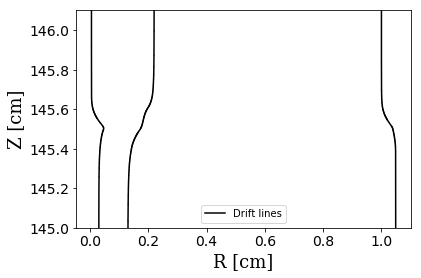

In [7]:
#Simple plot
#pop=-2
filename=file_list[7]
r_cm_array, z_cm_array, DriftTime_us_array = Get_drift_line_arrays(file_list[1])
plt.plot(r_cm_array, z_cm_array, '-k', label='Drift lines')

print file_list[9]
r_cm_array, z_cm_array, DriftTime_us_array = Get_drift_line_arrays(file_list[8])
plt.plot(r_cm_array, z_cm_array, '-k')

r_cm_array, z_cm_array, DriftTime_us_array = Get_drift_line_arrays(file_list[9])
plt.plot(r_cm_array, z_cm_array, '-k')

plt.xlabel('R [cm]',fontsize=18,family='serif')
plt.ylabel('Z [cm]',fontsize=18,family='serif')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

#plt.xlim(29.8,30.2)
plt.ylim(145,146.1)
plt.legend(loc='best')



100


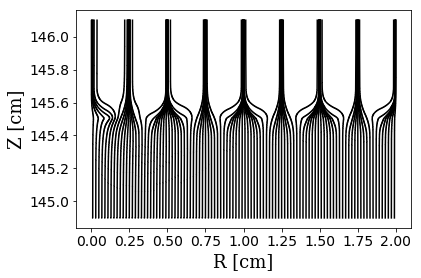

In [8]:
#
#pop=-2

figure(1)
for i in range(0, len(file_list)):
    r_cm_array, z_cm_array, DriftTime_us_array = Get_drift_line_arrays(file_list[i])
    #print file_list[i]
    #print Diff_z_cm_array[-1]
    
    if i==0:
        plt.plot(r_cm_array, z_cm_array, '-k', label='Drift lines')
    else:
        plt.plot(r_cm_array, z_cm_array, '-k')
        
plt.xlabel('R [cm]',fontsize=18,family='serif')
plt.ylabel('Z [cm]',fontsize=18,family='serif')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#pylab.legend(loc='best', fontsize=12)

#plt.ylim(0, 150)
#plt.xlim(29,31)

print len(file_list)

In [9]:
#Get final position of drift lines and plot on a histogram to show 'clumping'

In [10]:
"""#Get .63 data

filename = "/data/rossiter/lz/TopGridAnalysis_200507/SingleDriftLineCalc_0.0001cm_r00.62cm_z144.9cm_0507.txt"
r_cm_array_62, z_cm_array_62, DriftTime_us_array_62 = Get_drift_line_arrays(filename)
filename = "/data/rossiter/lz/TopGridAnalysis_200507/SingleDriftLineCalc_0.0001cm_r00.64cm_z144.9cm_0507.txt"
r_cm_array_64, z_cm_array_64, DriftTime_us_array_64 = Get_drift_line_arrays(filename)

print len(r_cm_array_62)
print len(r_cm_array_64)

r_cm_list_63=[]
z_cm_list_63=[]
for i in range(0, len(r_cm_array_64)):
    if i < len(r_cm_array_62):
        r = .5*(r_cm_array_62[i] + r_cm_array_64[i])
        z = .5*(z_cm_array_62[i] + z_cm_array_64[i])
    else:
        r= .5*(r_cm_array_62[-1]+ r_cm_array_64[i])
        z= .5*(z_cm_array_62[-1]+ z_cm_array_64[i])
    r_cm_list_63.append(r)
    z_cm_list_63.append(z)

"""

print "\n\t...Done!"


	...Done!


In [11]:
"""#Get .7 data

filename = "/data/rossiter/lz/TopGridAnalysis_200507/SingleDriftLineCalc_0.0001cm_r00.69cm_z144.9cm_0507.txt"
r_cm_array_69, z_cm_array_69, DriftTime_us_array_69 = Get_drift_line_arrays(filename)
filename = "/data/rossiter/lz/TopGridAnalysis_200507/SingleDriftLineCalc_0.0001cm_r00.71cm_z144.9cm_0507.txt"
r_cm_array_71, z_cm_array_71, DriftTime_us_array_71 = Get_drift_line_arrays(filename)

r_cm_list_70=[]
z_cm_list_70=[]
for i in range(0, len(r_cm_array_69)):
    if i < len(r_cm_array_71):
        r = .5*(r_cm_array_69[i] + r_cm_array_71[i])
        z = .5*(z_cm_array_69[i] + z_cm_array_71[i])
    else:
        r= .5*(r_cm_array_69[i]+ r_cm_array_71[-1])
        z= .5*(z_cm_array_69[i]+ z_cm_array_71[-1])
    r_cm_list_70.append(r)
    z_cm_list_70.append(z)"""

'#Get .7 data\n\nfilename = "/data/rossiter/lz/TopGridAnalysis_200507/SingleDriftLineCalc_0.0001cm_r00.69cm_z144.9cm_0507.txt"\nr_cm_array_69, z_cm_array_69, DriftTime_us_array_69 = Get_drift_line_arrays(filename)\nfilename = "/data/rossiter/lz/TopGridAnalysis_200507/SingleDriftLineCalc_0.0001cm_r00.71cm_z144.9cm_0507.txt"\nr_cm_array_71, z_cm_array_71, DriftTime_us_array_71 = Get_drift_line_arrays(filename)\n\nr_cm_list_70=[]\nz_cm_list_70=[]\nfor i in range(0, len(r_cm_array_69)):\n    if i < len(r_cm_array_71):\n        r = .5*(r_cm_array_69[i] + r_cm_array_71[i])\n        z = .5*(z_cm_array_69[i] + z_cm_array_71[i])\n    else:\n        r= .5*(r_cm_array_69[i]+ r_cm_array_71[-1])\n        z= .5*(z_cm_array_69[i]+ z_cm_array_71[-1])\n    r_cm_list_70.append(r)\n    z_cm_list_70.append(z)'

In [12]:
"""#Get .89 data

print file_list[85]
print file_list[86]
filename = "/data/rossiter/lz/TopGridAnalysis_200507/SingleDriftLineCalc_0.0001cm_r00.88cm_z144.9cm_0507.txt"
r_cm_array_88, z_cm_array_88, DriftTime_us_array_88 = Get_drift_line_arrays(filename)
filename = "/data/rossiter/lz/TopGridAnalysis_200507/SingleDriftLineCalc_0.0001cm_r00.90cm_z144.9cm_0507.txt"
r_cm_array_90, z_cm_array_90, DriftTime_us_array_90 = Get_drift_line_arrays(filename)

r_cm_list_89=[]
z_cm_list_89=[]
for i in range(0, len(r_cm_array_88)):
    if i < len(r_cm_array_90):
        r = .5*(r_cm_array_88[i] + r_cm_array_90[i])
        z = .5*(z_cm_array_88[i] + z_cm_array_90[i])
    else:
        r= .5*(r_cm_array_88[i]+ r_cm_array_90[-1])
        z= .5*(z_cm_array_88[i]+ z_cm_array_90[-1])
    r_cm_list_89.append(r)
    z_cm_list_89.append(z)
"""

'#Get .89 data\n\nprint file_list[85]\nprint file_list[86]\nfilename = "/data/rossiter/lz/TopGridAnalysis_200507/SingleDriftLineCalc_0.0001cm_r00.88cm_z144.9cm_0507.txt"\nr_cm_array_88, z_cm_array_88, DriftTime_us_array_88 = Get_drift_line_arrays(filename)\nfilename = "/data/rossiter/lz/TopGridAnalysis_200507/SingleDriftLineCalc_0.0001cm_r00.90cm_z144.9cm_0507.txt"\nr_cm_array_90, z_cm_array_90, DriftTime_us_array_90 = Get_drift_line_arrays(filename)\n\nr_cm_list_89=[]\nz_cm_list_89=[]\nfor i in range(0, len(r_cm_array_88)):\n    if i < len(r_cm_array_90):\n        r = .5*(r_cm_array_88[i] + r_cm_array_90[i])\n        z = .5*(z_cm_array_88[i] + z_cm_array_90[i])\n    else:\n        r= .5*(r_cm_array_88[i]+ r_cm_array_90[-1])\n        z= .5*(z_cm_array_88[i]+ z_cm_array_90[-1])\n    r_cm_list_89.append(r)\n    z_cm_list_89.append(z)\n'

In [13]:
"""#Get .84 data

print file_list[81]
print file_list[82]
filename = "/data/rossiter/lz/TopGridAnalysis_200507/SingleDriftLineCalc_0.0001cm_r00.83cm_z144.9cm_0507.txt"
r_cm_array_83, z_cm_array_83, DriftTime_us_array_83 = Get_drift_line_arrays(filename)
filename = "/data/rossiter/lz/TopGridAnalysis_200507/SingleDriftLineCalc_0.0001cm_r00.85cm_z144.9cm_0507.txt"
r_cm_array_85, z_cm_array_85, DriftTime_us_array_85 = Get_drift_line_arrays(filename)

r_cm_list_84=[]
z_cm_list_84=[]

k=0.016948999999999992
for i in range(0, len(r_cm_array_83)):
    if z_cm_array_83[i]<145.5:
        r = .5*(r_cm_array_83[i] + r_cm_array_85[i])
    else:
        r = r_cm_array_83[i] +k

    z = z_cm_array_83[i]
    r_cm_list_84.append(r)
    z_cm_list_84.append(z)


#plt.plot([0.8,.9], [z_cm_array_83[6018], z_cm_array_83[6018]], '--g')"""

'#Get .84 data\n\nprint file_list[81]\nprint file_list[82]\nfilename = "/data/rossiter/lz/TopGridAnalysis_200507/SingleDriftLineCalc_0.0001cm_r00.83cm_z144.9cm_0507.txt"\nr_cm_array_83, z_cm_array_83, DriftTime_us_array_83 = Get_drift_line_arrays(filename)\nfilename = "/data/rossiter/lz/TopGridAnalysis_200507/SingleDriftLineCalc_0.0001cm_r00.85cm_z144.9cm_0507.txt"\nr_cm_array_85, z_cm_array_85, DriftTime_us_array_85 = Get_drift_line_arrays(filename)\n\nr_cm_list_84=[]\nz_cm_list_84=[]\n\nk=0.016948999999999992\nfor i in range(0, len(r_cm_array_83)):\n    if z_cm_array_83[i]<145.5:\n        r = .5*(r_cm_array_83[i] + r_cm_array_85[i])\n    else:\n        r = r_cm_array_83[i] +k\n\n    z = z_cm_array_83[i]\n    r_cm_list_84.append(r)\n    z_cm_list_84.append(z)\n\n\n#plt.plot([0.8,.9], [z_cm_array_83[6018], z_cm_array_83[6018]], \'--g\')'

In [14]:
"""print len(r_cm_list_84)
print len(z_cm_array_83)


print r_cm_list_84[6017]
#print r_cm_array_83[6018]
print r_cm_array_83[6017]
print r_cm_list_84[6017]- r_cm_array_83[6017]

print "\n"
print z_cm_list_84[6017]
#print z_cm_array_83[6018]
print z_cm_array_83[6017]"""

'print len(r_cm_list_84)\nprint len(z_cm_array_83)\n\n\nprint r_cm_list_84[6017]\n#print r_cm_array_83[6018]\nprint r_cm_array_83[6017]\nprint r_cm_list_84[6017]- r_cm_array_83[6017]\n\nprint "\n"\nprint z_cm_list_84[6017]\n#print z_cm_array_83[6018]\nprint z_cm_array_83[6017]'

In [15]:
"""#.18 data
r_cm_array_18, z_cm_array_18, DriftTime_us_array_18 = Get_drift_line_arrays(file_list[18])
r_cm_array_19, z_cm_array_19, DriftTime_us_array_19 = Get_drift_line_arrays(file_list[19])"""

'#.18 data\nr_cm_array_18, z_cm_array_18, DriftTime_us_array_18 = Get_drift_line_arrays(file_list[18])\nr_cm_array_19, z_cm_array_19, DriftTime_us_array_19 = Get_drift_line_arrays(file_list[19])'

In [16]:
"""


n=6150
m=n-239
figure(1)
plt.plot(r_cm_array_18, z_cm_array_18, '-k')
plt.plot(r_cm_array_19, z_cm_array_19, '-g')
plt.plot(r_cm_array_18[n], z_cm_array_18[n], '.r')
plt.plot(r_cm_array_19[m], z_cm_array_19[m], '.r')


print "z_cm_array_18[n] = "+str(z_cm_array_18[n])
print "z_cm_array_19[m] = "+str(z_cm_array_19[m])

print "\nr_cm_array_18[n] = "+str(r_cm_array_18[n])
print "r_cm_array_19[m] = "+str(r_cm_array_19[m])
print r_cm_array_19[m] - r_cm_array_18[n]"""

'\n\n\nn=6150\nm=n-239\nfigure(1)\nplt.plot(r_cm_array_18, z_cm_array_18, \'-k\')\nplt.plot(r_cm_array_19, z_cm_array_19, \'-g\')\nplt.plot(r_cm_array_18[n], z_cm_array_18[n], \'.r\')\nplt.plot(r_cm_array_19[m], z_cm_array_19[m], \'.r\')\n\n\nprint "z_cm_array_18[n] = "+str(z_cm_array_18[n])\nprint "z_cm_array_19[m] = "+str(z_cm_array_19[m])\n\nprint "\nr_cm_array_18[n] = "+str(r_cm_array_18[n])\nprint "r_cm_array_19[m] = "+str(r_cm_array_19[m])\nprint r_cm_array_19[m] - r_cm_array_18[n]'

In [17]:
"""r_cm_list_18=[]
z_cm_list_18=[]

k =  z_cm_array_18[n] - z_cm_array_19[m]
k2 = .012#.5*(r_cm_array_19[-1]+r_cm_array_20[-1]) - r_cm_array_19[-1]#0.012969000000000008 
#n=0


m1 =  1 / (float(len(z_cm_array_19)) - float(n))
c1 =  -1.*m1*float(n)
for i in range(0, len(z_cm_array_19)):
    if i < n:
        r = r_cm_array_18[i]
        z = z_cm_array_18[i]
    elif i>=n:
        f = m1*float(i)+c1

        r = ( (1-f) * r_cm_array_18[i]) + (f * r_cm_array_19[i]) - (f* k2)
        z = ( (1-f) * z_cm_array_18[i]) + (f * z_cm_array_19[i])

    r_cm_list_18.append(r)
    z_cm_list_18.append(z)
        

#for i in range(0,len(z_cm_array_19)):
#    if i < n:
#        r = r_cm_array_18[i]
#        z = z_cm_array_18[i]
#        r_cm_list_18.append(r)
#        z_cm_list_18.append(z)
#        #elif i>=n and z_cm_array_19[i] < 145.8:
#    elif i>=n and i < 8000:
#        f = m1*float(i)+c1
#        r = r_cm_array_19[i] - f*k2
#        z = z_cm_array_19[i]+k
#        r_cm_list_18.append(r)
#        z_cm_list_18.append(z)
#    elif i==8000:
#        r = r_cm_array_19[i] - f*k2
#        z = z_cm_array_19[i]+k 
#        
#        print "r = "+str(r)
#        print "z = "+str(z)
#    #else:
#    #    z = z_cm_array_19[i]+k
#    #r_cm_list_18.append(r)
#    #z_cm_list_18.append(z)
    
#r_cm_list_18.append(r)
#z_cm_list_18.append(z_cm_array_19[-1])
   

figure(1)
plt.plot(r_cm_array_18, z_cm_array_18, '--k')
plt.plot(r_cm_array_19, z_cm_array_19, '--g')
plt.plot(r_cm_list_18, z_cm_list_18, '-b')
plt.plot(r_cm_array_18[n], z_cm_array_18[n], '.r')
plt.plot(r_cm_array_19[m], z_cm_array_19[m], '.r')"""

'r_cm_list_18=[]\nz_cm_list_18=[]\n\nk =  z_cm_array_18[n] - z_cm_array_19[m]\nk2 = .012#.5*(r_cm_array_19[-1]+r_cm_array_20[-1]) - r_cm_array_19[-1]#0.012969000000000008 \n#n=0\n\n\nm1 =  1 / (float(len(z_cm_array_19)) - float(n))\nc1 =  -1.*m1*float(n)\nfor i in range(0, len(z_cm_array_19)):\n    if i < n:\n        r = r_cm_array_18[i]\n        z = z_cm_array_18[i]\n    elif i>=n:\n        f = m1*float(i)+c1\n\n        r = ( (1-f) * r_cm_array_18[i]) + (f * r_cm_array_19[i]) - (f* k2)\n        z = ( (1-f) * z_cm_array_18[i]) + (f * z_cm_array_19[i])\n\n    r_cm_list_18.append(r)\n    z_cm_list_18.append(z)\n        \n\n#for i in range(0,len(z_cm_array_19)):\n#    if i < n:\n#        r = r_cm_array_18[i]\n#        z = z_cm_array_18[i]\n#        r_cm_list_18.append(r)\n#        z_cm_list_18.append(z)\n#        #elif i>=n and z_cm_array_19[i] < 145.8:\n#    elif i>=n and i < 8000:\n#        f = m1*float(i)+c1\n#        r = r_cm_array_19[i] - f*k2\n#        z = z_cm_array_19[i]+k\n#     

In [18]:
"""r_cm_array_20, z_cm_array_20, DriftTime_us_array_20 = Get_drift_line_arrays(file_list[20])

figure(1)
plt.plot(r_cm_array_19, z_cm_array_19, '-r')
plt.plot(r_cm_array_20, z_cm_array_20, '-b')

print len(r_cm_array_19)
print len(r_cm_array_20)


print r_cm_array_20[-1] - r_cm_array_19[-1]
    """

"r_cm_array_20, z_cm_array_20, DriftTime_us_array_20 = Get_drift_line_arrays(file_list[20])\n\nfigure(1)\nplt.plot(r_cm_array_19, z_cm_array_19, '-r')\nplt.plot(r_cm_array_20, z_cm_array_20, '-b')\n\nprint len(r_cm_array_19)\nprint len(r_cm_array_20)\n\n\nprint r_cm_array_20[-1] - r_cm_array_19[-1]\n    "

In [19]:
"""print r_cm_array_19[-1]
print z_cm_array_19[-1]
print "\n"
print r_cm_array_18[-1]
print z_cm_array_18[-1]"""

'print r_cm_array_19[-1]\nprint z_cm_array_19[-1]\nprint "\n"\nprint r_cm_array_18[-1]\nprint z_cm_array_18[-1]'

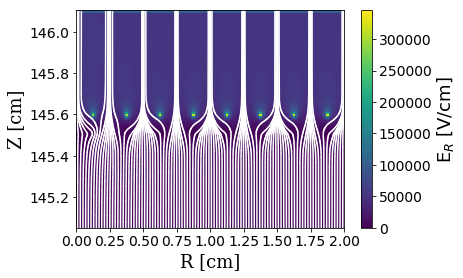

In [20]:
#Show field with field lines
size1 = 14
size2 = 18

figure(1)
plt.xlabel('R [cm]',fontsize=size2,family='serif')
plt.ylabel('Z [cm]',fontsize=size2,family='serif')
plt.xticks(fontsize=size1)
plt.yticks(fontsize=size1)

x_FIELD = FIELD_r_cm
y_FIELD = FIELD_z_cm
z_FIELD = FIELD_E_Vpm
x_ARRAY = np.asarray(x_FIELD)
y_ARRAY = np.asarray(y_FIELD)
z_ARRAY = np.asarray(z_FIELD)
shape = np.unique(x_ARRAY).shape[0],np.unique(y_ARRAY).shape[0]

x_arr = np.asarray(FIELD_r_cm).reshape(shape)
y_arr = np.asarray(FIELD_z_cm).reshape(shape)
z_arr =  np.asarray(FIELD_E_Vpm).reshape(shape)
plt.rcParams['image.cmap'] = 'viridis'
plt.xlim(0,2)
plt.ylim(145.05,146.105)
cmesh = plt.pcolormesh(x_arr,y_arr,z_arr)


for i in range(0, len(file_list)):
    r_cm_array, z_cm_array, DriftTime_us_array = Get_drift_line_arrays(file_list[i])
    #print file_list[i]
    #print Diff_z_cm_array[-1]
    
    if i==0:
        plt.plot(r_cm_array, z_cm_array, '-w', label='Drift lines')
    #elif i==5:
    #    print file_list[i]
    #    plt.plot(r_cm_array, z_cm_array, '-r')
    else:
        plt.plot(r_cm_array, z_cm_array, '-w')

#plt.plot(r_cm_list_63, z_cm_list_63, '-r')
#plt.plot(r_cm_list_70, z_cm_list_70, '-r')
#plt.plot(r_cm_list_89, z_cm_list_89, '-r')
#plt.plot(r_cm_list_84, z_cm_list_84, '-r')

cbar = plt.colorbar(cmesh)
cbar.set_label('E$_{R}$ [V/cm]', size=size2)#
cbar.ax.tick_params(labelsize=size1)
#cbar = plt.colorbar()                                                                         
#cbar.ax.tick_params(size=15)   

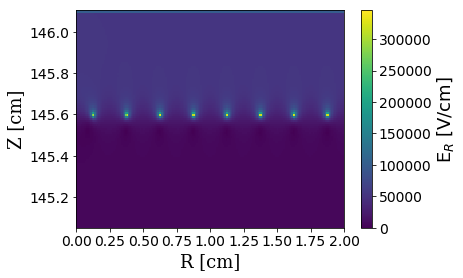

In [21]:
#Show field with field lines
size1 = 14
size2 = 18

figure(1)
plt.xlabel('R [cm]',fontsize=size2,family='serif')
plt.ylabel('Z [cm]',fontsize=size2,family='serif')
plt.xticks(fontsize=size1)
plt.yticks(fontsize=size1)

x_FIELD = FIELD_r_cm
y_FIELD = FIELD_z_cm
z_FIELD = FIELD_E_Vpm
x_ARRAY = np.asarray(x_FIELD)
y_ARRAY = np.asarray(y_FIELD)
z_ARRAY = np.asarray(z_FIELD)
shape = np.unique(x_ARRAY).shape[0],np.unique(y_ARRAY).shape[0]

x_arr = np.asarray(FIELD_r_cm).reshape(shape)
y_arr = np.asarray(FIELD_z_cm).reshape(shape)
z_arr =  np.asarray(FIELD_E_Vpm).reshape(shape)
plt.rcParams['image.cmap'] = 'viridis'
plt.xlim(0,2)
plt.ylim(145.05,146.105)
cmesh = plt.pcolormesh(x_arr,y_arr,z_arr)


cbar = plt.colorbar(cmesh)
cbar.set_label('E$_{R}$ [V/cm]', size=size2)#
cbar.ax.tick_params(labelsize=size1)
  

In [22]:
"""
./eDriftCalc/SingleDriftLineCalc_exe  0 144.9 0507 0.00001 /data/rossiter/lz/TopGridAnalysis_200507/.
./eDriftCalc/SingleDriftLineCalc_exe  0.0105 144.9 0507 0.00001 /data/rossiter/lz/TopGridAnalysis_200507/.
./eDriftCalc/SingleDriftLineCalc_exe  0.021 144.9 0507 0.00001 /data/rossiter/lz/TopGridAnalysis_200507/.
./eDriftCalc/SingleDriftLineCalc_exe  0.0315 144.9 0507 0.00001 /data/rossiter/lz/TopGridAnalysis_200507/.
./eDriftCalc/SingleDriftLineCalc_exe  0.042 144.9 0507 0.00001 /data/rossiter/lz/TopGridAnalysis_200507/.
./eDriftCalc/SingleDriftLineCalc_exe  0.0525 144.9 0507 0.00001 /data/rossiter/lz/TopGridAnalysis_200507/.
./eDriftCalc/SingleDriftLineCalc_exe  0.063 144.9 0507 0.00001 /data/rossiter/lz/TopGridAnalysis_200507/.
./eDriftCalc/SingleDriftLineCalc_exe  0.0735 144.9 0507 0.00001 /data/rossiter/lz/TopGridAnalysis_200507/.
./eDriftCalc/SingleDriftLineCalc_exe  0.084 144.9 0507 0.00001 /data/rossiter/lz/TopGridAnalysis_200507/.
./eDriftCalc/SingleDriftLineCalc_exe  0.0945 144.9 0507 0.00001 /data/rossiter/lz/TopGridAnalysis_200507/.
./eDriftCalc/SingleDriftLineCalc_exe  0.105 144.9 0507 0.00001 /data/rossiter/lz/TopGridAnalysis_200507/.
./eDriftCalc/SingleDriftLineCalc_exe  0.1155 144.9 0507 0.00001 /data/rossiter/lz/TopGridAnalysis_200507/.
./eDriftCalc/SingleDriftLineCalc_exe  0.126 144.9 0507 0.00001 /data/rossiter/lz/TopGridAnalysis_200507/.
./eDriftCalc/SingleDriftLineCalc_exe 0.1356666667 144.9 0507 0.00001 /data/rossiter/lz/TopGridAnalysis_200507/.
./eDriftCalc/SingleDriftLineCalc_exe  0.1453333333 144.9 0507 0.00001 /data/rossiter/lz/TopGridAnalysis_200507/.
./eDriftCalc/SingleDriftLineCalc_exe  0.155 144.9 0507 0.00001 /data/rossiter/lz/TopGridAnalysis_200507/.
./eDriftCalc/SingleDriftLineCalc_exe  0.1646666667 144.9 0507 0.00001 /data/rossiter/lz/TopGridAnalysis_200507/.
./eDriftCalc/SingleDriftLineCalc_exe  0.1743333333 144.9 0507 0.00001 /data/rossiter/lz/TopGridAnalysis_200507/.
./eDriftCalc/SingleDriftLineCalc_exe  0.184 144.9 0507 0.00001 /data/rossiter/lz/TopGridAnalysis_200507/.
./eDriftCalc/SingleDriftLineCalc_exe  0.1936666667 144.9 0507 0.00001 /data/rossiter/lz/TopGridAnalysis_200507/.
./eDriftCalc/SingleDriftLineCalc_exe  0.2033333333 144.9 0507 0.00001 /data/rossiter/lz/TopGridAnalysis_200507/.
./eDriftCalc/SingleDriftLineCalc_exe  0.213 144.9 0507 0.00001 /data/rossiter/lz/TopGridAnalysis_200507/.
./eDriftCalc/SingleDriftLineCalc_exe  0.2226666667 144.9 0507 0.00001 /data/rossiter/lz/TopGridAnalysis_200507/.
./eDriftCalc/SingleDriftLineCalc_exe  0.2323333333 144.9 0507 0.00001 /data/rossiter/lz/TopGridAnalysis_200507/.
./eDriftCalc/SingleDriftLineCalc_exe  0.242 144.9 0507 0.00001 /data/rossiter/lz/TopGridAnalysis_200507/.
./eDriftCalc/SingleDriftLineCalc_exe  0.2516666667 144.9 0507 0.00001 /data/rossiter/lz/TopGridAnalysis_200507/.
./eDriftCalc/SingleDriftLineCalc_exe  0.2613333333 144.9 0507 0.00001 /data/rossiter/lz/TopGridAnalysis_200507/.
./eDriftCalc/SingleDriftLineCalc_exe  0.271 144.9 0507 0.00001 /data/rossiter/lz/TopGridAnalysis_200507/.
./eDriftCalc/SingleDriftLineCalc_exe  0.2806666667 144.9 0507 0.00001 /data/rossiter/lz/TopGridAnalysis_200507/.
./eDriftCalc/SingleDriftLineCalc_exe  0.2903333333 144.9 0507 0.00001 /data/rossiter/lz/TopGridAnalysis_200507/.
"""

'\n./eDriftCalc/SingleDriftLineCalc_exe  0 144.9 0507 0.00001 /data/rossiter/lz/TopGridAnalysis_200507/.\n./eDriftCalc/SingleDriftLineCalc_exe  0.0105 144.9 0507 0.00001 /data/rossiter/lz/TopGridAnalysis_200507/.\n./eDriftCalc/SingleDriftLineCalc_exe  0.021 144.9 0507 0.00001 /data/rossiter/lz/TopGridAnalysis_200507/.\n./eDriftCalc/SingleDriftLineCalc_exe  0.0315 144.9 0507 0.00001 /data/rossiter/lz/TopGridAnalysis_200507/.\n./eDriftCalc/SingleDriftLineCalc_exe  0.042 144.9 0507 0.00001 /data/rossiter/lz/TopGridAnalysis_200507/.\n./eDriftCalc/SingleDriftLineCalc_exe  0.0525 144.9 0507 0.00001 /data/rossiter/lz/TopGridAnalysis_200507/.\n./eDriftCalc/SingleDriftLineCalc_exe  0.063 144.9 0507 0.00001 /data/rossiter/lz/TopGridAnalysis_200507/.\n./eDriftCalc/SingleDriftLineCalc_exe  0.0735 144.9 0507 0.00001 /data/rossiter/lz/TopGridAnalysis_200507/.\n./eDriftCalc/SingleDriftLineCalc_exe  0.084 144.9 0507 0.00001 /data/rossiter/lz/TopGridAnalysis_200507/.\n./eDriftCalc/SingleDriftLineCalc_e

# -Look at clumping of final positions

In [23]:
#r_cm, z_cm, DriftTime_us = Get_i_line_from_file(filename, i)

In [24]:
#Get all txt files in directory
dir_2 = "/data/rossiter/lz/TopGridAnalysis_Dense_200508/"
file_list_Dense=[]
for file in os.listdir(dir_2):
    if file.endswith(".txt"):
        #print(os.path.join(file))
        file_list_Dense.append(dir_2+os.path.join(file))

print "len(file_list): "+str(len(file_list_Dense))

len(file_list): 2002


In [25]:
origin_r_hist_list=[]
r_hist_list =[]

for i in range(0, len(file_list_Dense)):
    r_cm, z_cm, DriftTime_us = Get_i_line_from_file(file_list_Dense[i], -1)
    r_hist_list.append(r_cm)
    
    r_cm, z_cm, DriftTime_us = Get_i_line_from_file(file_list_Dense[i], 4)
    origin_r_hist_list.append(r_cm)
    
    
print len(r_hist_list)

2002


In [26]:
#get del r list
del_r_hist_list =[]
for i in range(0, len(r_hist_list)):
    if origin_r_hist_list[i] > .125 and origin_r_hist_list[i] < 1.875:
        del_r_hist_list.append(origin_r_hist_list[i] - r_hist_list[i] )

print len(del_r_hist_list)

1749


(array([11.,  6., 12., 30., 20., 19., 14., 14., 12., 11.,  9., 10., 10.,
         9.,  8., 10.,  9., 16., 16., 14., 14., 12., 13., 12., 12., 13.,
        22., 34., 26., 25., 24., 23., 22., 23., 22., 21., 21., 22., 21.,
        21., 22., 23., 21., 22., 21., 22., 21., 21., 22., 23., 21., 21.,
        21., 22., 21., 21., 21., 23., 22., 22., 21., 21., 22., 21., 21.,
        22., 22., 21., 23., 23., 22., 23., 24., 30., 25., 25., 31.,  9.,
         9.,  9.,  9.,  8., 10.,  9.,  9.,  9.,  9.,  9.,  9.,  9., 10.,
        10.,  9., 11., 12., 12., 12., 17., 22., 24.]),
 array([-0.143481  , -0.14068729, -0.13789358, -0.13509987, -0.13230616,
        -0.12951245, -0.12671874, -0.12392503, -0.12113132, -0.11833761,
        -0.1155439 , -0.11275019, -0.10995648, -0.10716277, -0.10436906,
        -0.10157535, -0.09878164, -0.09598793, -0.09319422, -0.09040051,
        -0.0876068 , -0.08481309, -0.08201938, -0.07922567, -0.07643196,
        -0.07363825, -0.07084454, -0.06805083, -0.06525712, -0.062463

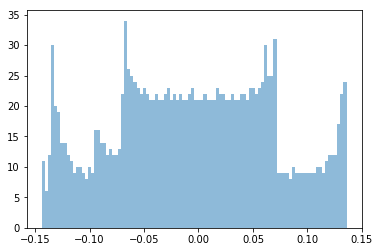

In [27]:
figure(1)
plt.hist(del_r_hist_list, bins=100, alpha=0.5)

(501,)
[6.43315000e-06 4.00514028e-03 8.00384742e-03 1.20025546e-02
 1.60012617e-02 1.99999688e-02 2.39986760e-02 2.79973831e-02
 3.19960902e-02 3.59947974e-02 3.99935045e-02 4.39922116e-02
 4.79909188e-02 5.19896259e-02 5.59883330e-02 5.99870402e-02
 6.39857473e-02 6.79844544e-02 7.19831616e-02 7.59818687e-02
 7.99805758e-02 8.39792830e-02 8.79779901e-02 9.19766972e-02
 9.59754044e-02 9.99741115e-02 1.03972819e-01 1.07971526e-01
 1.11970233e-01 1.15968940e-01 1.19967647e-01 1.23966354e-01
 1.27965061e-01 1.31963769e-01 1.35962476e-01 1.39961183e-01
 1.43959890e-01 1.47958597e-01 1.51957304e-01 1.55956011e-01
 1.59954718e-01 1.63953426e-01 1.67952133e-01 1.71950840e-01
 1.75949547e-01 1.79948254e-01 1.83946961e-01 1.87945668e-01
 1.91944376e-01 1.95943083e-01 1.99941790e-01 2.03940497e-01
 2.07939204e-01 2.11937911e-01 2.15936618e-01 2.19935326e-01
 2.23934033e-01 2.27932740e-01 2.31931447e-01 2.35930154e-01
 2.39928861e-01 2.43927568e-01 2.47926275e-01 2.51924983e-01
 2.55923690e-01 2

0.54183124976635	0.0
0.54582995690005	1.0
0.54982866403375	0.0
0.55382737116745	0.0
0.5578260783011499	1.0
0.56182478543485	0.0
0.56582349256855	0.0
0.56982219970225	0.0
0.57382090683595	0.0
0.57781961396965	0.0
0.58181832110335	0.0
0.58581702823705	1.0
0.5898157353707499	0.0
0.59381444250445	0.0
0.59781314963815	0.0
0.60181185677185	0.0
0.60581056390555	0.0
0.60980927103925	0.0
0.61380797817295	0.0
0.61780668530665	0.0
0.6218053924403499	0.0
0.62580409957405	0.0
0.62980280670775	0.0
0.63380151384145	0.0
0.63780022097515	0.0
0.64179892810885	1.0
0.64579763524255	0.0
0.64979634237625	0.0
0.6537950495099499	0.0
0.65779375664365	0.0
0.66179246377735	0.0
0.66579117091105	0.0
0.66978987804475	0.0
0.67378858517845	0.0
0.67778729231215	0.0
0.6817859994458499	0.0
0.6857847065795499	0.0
0.68978341371325	0.0
0.69378212084695	0.0
0.69778082798065	1.0
0.70177953511435	0.0
0.70577824224805	0.0
0.70977694938175	0.0
0.7137756565154499	0.0
0.7177743636491499	0.0
0.72177307078285	1.0
0.72577177791655	1

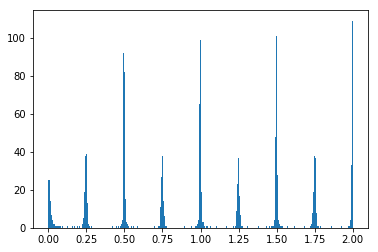

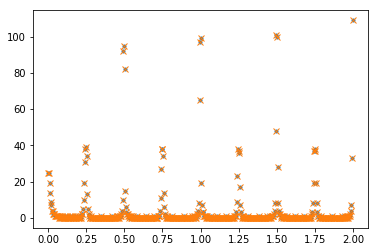

In [28]:
#Inspect initial histogram
num_bins =  500
#(full_n, full_bins, full_patches) = plt.hist(Full_Reduced_R_list, bins=num_bins)
figure(1)
(n_R, bins, patches) = plt.hist(r_hist_list, bins=num_bins)

#Get bin mids
print bins.shape
print bins

R_bin_mids_list = []
for i in range(1, len(bins)):
    R_bin_mids_list.append( (bins[i] + bins[i-1])/2 )
    
this_half_bid_width = .5*(R_bin_mids_list[1] - R_bin_mids_list[0])

#print bin_mids_list[-1]
#print bin_mids_list[-1]+this_half_bid_width
#print bin_mids_list[-1]-this_half_bid_width


#Remove bins with n<threshold, & remove top bin
threshold=0
print n_R.shape
print n_R
print "\n"

counter = 0
new_bin_mids_list = []
new_n_list = []
for i in range(0, len(n_R)):
    if n_R[i] < threshold:# or n_R[i] > 15000:
        #print( str(i)+": ("+str(bin_mids_list[i])+", "+str(n[i])+")" )
        counter +=1
    else:
        new_bin_mids_list.append(R_bin_mids_list[i])
        new_n_list.append(n_R[i])

#new_bin_mids_list = new_bin_mids_list[:-1]
#new_n_list =new_n_list[:-1]

#new_bin_mids_list = new_bin_mids_list[:-1]
#new_n_list =new_n_list[:-1]

#new_bin_mids_list = new_bin_mids_list[:-1]
#new_n_list =new_n_list[:-1]

#new_bin_mids_list = new_bin_mids_list[:-1]
#new_n_list =new_n_list[:-1]

#new_bin_mids_list = new_bin_mids_list[:-1]
#new_n_list =new_n_list[:-1]

print("\n\tcount = "+str(counter)+" / "+str(len(n_R)))


#Inspect bins
print "bin_mids\t bin_count"
for i in range(0,len(R_bin_mids_list)):
    print str(R_bin_mids_list[i])+"\t"+str(n_R[i])
    


#Inspect bins
print "\n-------\nNEW BINS"
print "bin_mids\t bin_count"
for i in range(0,len(new_bin_mids_list)):
    print str(new_bin_mids_list[i])+"\t"+str(new_n_list[i])

#Inspect elements with n>10
figure(2)
plt.plot(R_bin_mids_list, n_R, ".")
plt.plot(new_bin_mids_list,  new_n_list, 'x')

(array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04]),
 <a list of 7 Text yticklabel objects>)

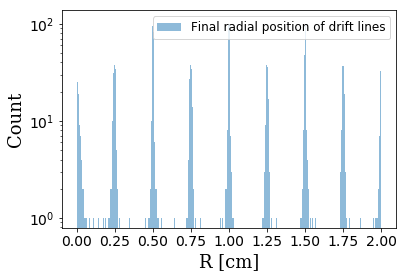

In [29]:
#R plot
#num_bins=100
fig = plt.figure(1)
ax = fig.add_subplot(1, 1, 1)

ax.hist(r_hist_list, bins=num_bins, alpha=0.5, label='Final radial position of drift lines')
#ax.plot(R_bin_mids_list, n_R, ".b", markersize='10')
#ax.errorbar(R_bin_mids_list, np.asarray(n_R), pow(np.asarray(n_R),.5), ecolor='blue', capsize=3, fmt=' ')
pylab.legend(loc='best', fontsize=12)
ax.set_yscale('log')

#plt.xlim(0.85, 1.15)


plt.xlabel('R [cm]',fontsize=18,family='serif')
plt.ylabel('Count',fontsize=18,family='serif')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

In [30]:
"""
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

x = np.linspace(0,4,50)
y = func(x, 2.5, 1.3, 0.5)
yn = y + 0.2*np.random.normal(size=len(x))

popt, pcov = curve_fit(func, x, yn)
"""

'\ndef func(x, a, b, c):\n    return a * np.exp(-b * x) + c\n\nx = np.linspace(0,4,50)\ny = func(x, 2.5, 1.3, 0.5)\nyn = y + 0.2*np.random.normal(size=len(x))\n\npopt, pcov = curve_fit(func, x, yn)\n'

Populating the interactive namespace from numpy and matplotlib


/cvmfs/sft.cern.ch/lcg/views/LCG_95/x86_64-centos7-gcc8-opt/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['shape']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


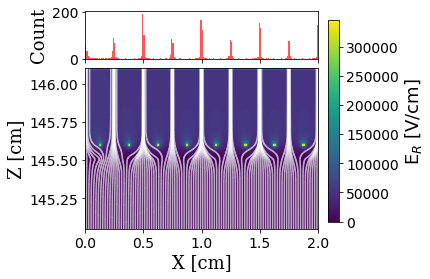

In [31]:
%pylab inline
pylab.rcParams['figure.figsize'] = (5.0, 4.0)


num_bins=200

fig = plt.figure(1)

gs = GridSpec(4,4)

ax_joint = fig.add_subplot(gs[1:4,0:3])
ax_marg_x = fig.add_subplot(gs[0,0:3])
#ax_marg_y = fig.add_subplot(gs[1:4,3])

img = ax_joint.pcolormesh(x_arr,y_arr,z_arr)

ax_marg_x.hist(r_hist_list, bins=num_bins, alpha=0.66, color='red', label='Final radial position of drift lines')
#ax_marg_x.plot(phot_keV_list, phot_Intensity_list, 'xr')
#ax_marg_x.set_yscale('log')
ax_marg_x.set_xlim(0, 2)
ax_joint.set_xlim(0,2)
ax_joint.set_ylim(145.05,146.105)

# Turn off tick labels on marginals
plt.setp(ax_marg_x.get_xticklabels(), visible=False)

# Set labels on joint
ax_joint.set_xlabel('Joint x label')
ax_joint.set_ylabel('Joint y label')


ax_joint.set_ylabel('Z [cm]',fontsize=18,family='serif')
ax_joint.set_xlabel('X [cm]',fontsize=18,family='serif')
ax_joint.tick_params(axis='both', which='major', labelsize=14)
ax_joint.tick_params(axis='both', which='major', labelsize=14)

for i in range(0, len(file_list)):
    r_cm_array, z_cm_array, DriftTime_us_array = Get_drift_line_arrays(file_list[i])
    #print file_list[i]
    #print Diff_z_cm_array[-1]
    
    if i==0:
        ax_joint.plot(r_cm_array, z_cm_array, '-w', alpha=.66,label='Drift lines')
    #elif i==5:
    #    print file_list[i]
    #    plt.plot(r_cm_array, z_cm_array, '-r')
    else:
        ax_joint.plot(r_cm_array, z_cm_array, '-w', alpha=.66)


# Set labels on marginals
#ax_marg_y.set_xlabel('Marginal x label')
#ax_marg_y.set_xlabel('Probability',fontsize=18,family='serif')
ax_marg_x.set_ylabel('Count',fontsize=18,family='serif')

ax_marg_x.tick_params(axis='both', which='major', labelsize=14)
#ax_marg_y.tick_params(axis='both', which='major', labelsize=14)
##ax_marg_x.set_xticks(fontsize=14)
##plt.ylabel('Probability',fontsize=18,family='serif')

#fig.colorbar(img)

fig.subplots_adjust(right=1.0)
cbar_ax = fig.add_axes([0.8, 0.15, 0.03, 0.7])
cbar=fig.colorbar(img, cax=cbar_ax)

#cbar = ax_joint.colorbar()                                                                  
#cbar.ax.tick_params(labelsize=12)  


#cbar = plt.colorbar(cmesh)
cbar.set_label('E$_{R}$ [V/cm]', size=size2)#
cbar.ax.tick_params(labelsize=size1)

# -Bottom Grids

121
		...Done!
		...Done!


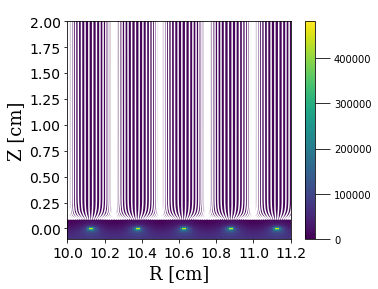

In [32]:
#Import single drift line
folder = '/data/rossiter/lz/BottomGridAnalysis_200513/'
inpath = folder+'CR_SingleDriftLineCalc_TimeStep_0.01us_r10.55cm_z00.09cm_1116.txt'
rIN_cm = []
zIN_cm = []
DT_IN_us=[]
rOUT_cm= []
zOUT_cm= []

for line in open(inpath):
    if line.startswith('#'):
        continue
    if line.startswith('*'):
        continue
    else:
        data = line.split('\t\t')
        rIN_cm.append(float(data[0]))
        zIN_cm.append(float(data[1]))
        DT_IN_us.append(float(data[2]))
        rOUT_cm.append(float(data[3]))
        zOUT_cm.append(float(data[4]))
        
#Import all drift lines from filelist
in_filelist_path = '../BottomGridAnalysis_200513/Driftlines_10ns_1116_CR_filelist.txt'

filelist = []
for f in open(in_filelist_path):
    file = f.split('\n')[0]
    filelist.append(file)

print len(filelist)
print('\t\t...Done!')

# All lines - Grid region with TOTAL field strength
#print len(filelist)
#print filelist[0]

#Import Field Strength
inpath = '/home/rossiter/XYZPositionCorrector/cathoderegion_100kv_100.txt'
FIELD_z_cm = []
FIELD_r_cm = []
FIELD_U_V=[]
FIELD_E_Vpm= []
FIELD_Ez_Vpm= []
FIELD_Er_Vpm= []

for line in open(inpath):
    if line.startswith('#'):
        continue
    if line.startswith('*'):
        continue
    else:
        data = line.split(',\t\t')
        FIELD_z_cm.append(-1*float(data[0]))
        FIELD_r_cm.append(float(data[1]))
        FIELD_U_V.append(float(data[2]))
        FIELD_E_Vpm.append(float(data[3])/10.) #Make it V/cm
        FIELD_Ez_Vpm.append(float(data[4])/10.)
        FIELD_Er_Vpm.append(float(data[5])/10.)

print "\t\t...Done!"

#folder = '/project/projectdirs/lz/users/rossiter/DriftAnalysis_181111/data/Driftlines_10ns_1116_CR/'

figure(1)
for file in filelist:
    inpath=folder+str(file) 
    rIN_cm = []
    zIN_cm = []
    DT_IN_us = []
    rOUT_cm = []
    zOUT_cm = []   
    for line in open(inpath):
        #print file
        if line.startswith('#'):
            continue
        if line.startswith('*'):
            continue
        else:
            data = line.split('		')
            #print data[0]
            rIN_cm.append(float(data[0]))
            zIN_cm.append(float(data[1]))
            DT_IN_us.append(float(data[2]))
            rOUT_cm.append(float(data[3]))
            zOUT_cm.append(float(data[4]))
    
    x = rOUT_cm
    y = zOUT_cm
    plt.plot(x,y,'white')


x_FIELD = FIELD_r_cm
y_FIELD = FIELD_z_cm
z_FIELD = FIELD_E_Vpm

#plt.title('Drift Lines (10 ns Step Time)')
plt.xlabel('R [cm]',fontsize=18,family='serif')
plt.ylabel('Z [cm]',fontsize=18,family='serif')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlim([0,1])
plt.ylim([145,146.2])

x_ARRAY = np.asarray(x_FIELD)
y_ARRAY = np.asarray(y_FIELD)
z_ARRAY = np.asarray(z_FIELD)

shape = np.unique(x_ARRAY).shape[0],np.unique(y_ARRAY).shape[0]
x_arr2 = x_ARRAY.reshape(shape)
y_arr2 = y_ARRAY.reshape(shape)
z_arr2 = z_ARRAY.reshape(shape)
plt.rcParams['image.cmap'] = 'viridis'
plt.xlim([10,11.2])
plt.ylim([-.1,2.])
plt.pcolormesh(x_arr2,y_arr2,z_arr2)

cbar = plt.colorbar()                                                                          
cbar.ax.tick_params(size=15)         

#fig.subplots_adjust(right=1.0)
#cbar_ax = fig.add_axes([0.8, 0.15, 0.02, 0.7])
#fig.colorbar(img, cax=cbar_ax)


(array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03, 1.e+04]),
 <a list of 7 Text yticklabel objects>)

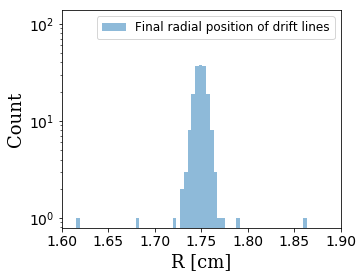

In [33]:
#R plot
n=1.75
d=.15

num_bins=500
fig = plt.figure(1)
ax = fig.add_subplot(1, 1, 1)

ax.hist(r_hist_list, bins=num_bins, alpha=0.5, label='Final radial position of drift lines')
#ax.plot(R_bin_mids_list, n_R, ".b", markersize='10')
#ax.errorbar(R_bin_mids_list, np.asarray(n_R), pow(np.asarray(n_R),.5), ecolor='blue', capsize=3, fmt=' ')
pylab.legend(loc='best', fontsize=12)
ax.set_yscale('log')

plt.xlim(n-d, n+d)


plt.xlabel('R [cm]',fontsize=18,family='serif')
plt.ylabel('Count',fontsize=18,family='serif')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 <a list of 7 Text yticklabel objects>)

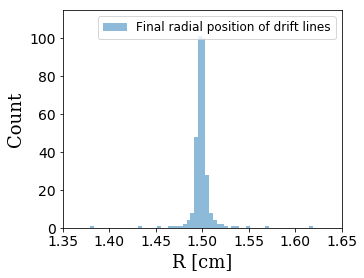

In [34]:
#R plot
n=1.5
d=.15

num_bins=500
fig = plt.figure(1)
ax = fig.add_subplot(1, 1, 1)

ax.hist(r_hist_list, bins=num_bins, alpha=0.5, label='Final radial position of drift lines')
#ax.plot(R_bin_mids_list, n_R, ".b", markersize='10')
#ax.errorbar(R_bin_mids_list, np.asarray(n_R), pow(np.asarray(n_R),.5), ecolor='blue', capsize=3, fmt=' ')
pylab.legend(loc='best', fontsize=12)
#ax.set_yscale('log')

plt.xlim(n-d, n+d)


plt.xlabel('R [cm]',fontsize=18,family='serif')
plt.ylabel('Count',fontsize=18,family='serif')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

In [35]:
#Fit 7 Gaussians between R:0 - 2 (exclude 0 and 2)

In [36]:
#Gaussian Function
def Gaussian(x, mu, sigma):
    A= 1/(sigma*pow(2*pi,.5))
    B= -.5*pow((x-mu)/sigma, 2.)
    return A*np.exp(B)
vGaussian = np.vectorize(Gaussian)


305
fit_mu: 1.4991939016393443
fit_sigma: 0.005036239573283381


(array([ 0.,  2.,  4.,  6.,  8., 10., 12., 14., 16.]),
 <a list of 9 Text yticklabel objects>)

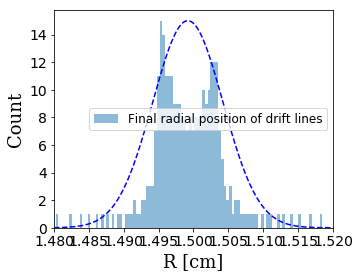

In [37]:
#
n=1.5
d=.02

temp_r_list = []
for element in r_hist_list:
    if element > n-d and element < n+d:
        temp_r_list.append(element)

print len(temp_r_list)

#Get Gaussian fit for hist and a predicted Gaussian from the line without diffusion
from scipy.stats import norm

num_bins=100

fit_mu, fit_sigma = norm.fit(temp_r_list)
fit_sigma= fit_sigma#*.8

print "fit_mu: "+str(fit_mu)
print "fit_sigma: "+str(fit_sigma)

GausFit_x = np.arange(n-d, n+d, .0001)
GausFit_y = vGaussian(GausFit_x, fit_mu, fit_sigma)

hist, n_bins = np.histogram(temp_r_list, bins=num_bins)

GausFitNorm = max(hist)/max(GausFit_y)

    
#
fig = plt.figure(1)
ax = fig.add_subplot(1, 1, 1)

ax.hist(temp_r_list, bins=num_bins, alpha=0.5, label='Final radial position of drift lines')
#ax.plot(R_bin_mids_list, n_R, ".b", markersize='10')
#ax.errorbar(R_bin_mids_list, np.asarray(n_R), pow(np.asarray(n_R),.5), ecolor='blue', capsize=3, fmt=' ')
pylab.legend(loc='best', fontsize=12)
ax.plot(GausFit_x, GausFit_y*GausFitNorm, '--b', label="Gaussian Fit")

#ax.set_yscale('log')
plt.xlim(n-d, n+d)


plt.xlabel('R [cm]',fontsize=18,family='serif')
plt.ylabel('Count',fontsize=18,family='serif')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)